In [ ]:
# https://qiita.com/yhyhyhjp/items/ebda34f46369b7d3ac8e

In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score 
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 

<Figure size 432x288 with 0 Axes>

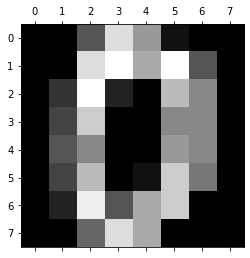

In [2]:
digits = load_digits()
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show()

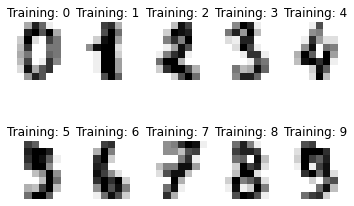

In [3]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.axis('off')
    plt.title('Training: %i' % label)
plt.show()

In [7]:
# x = digits.data でも以下でもどちらでもOK
x = digits.images.reshape(len(digits.images), -1)
y = digits.target
print(x.shape, y.shape)

(1797, 64) (1797,)


In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [9]:
x_test.shape

(540, 64)

In [10]:
clf = MLPClassifier(hidden_layer_sizes=(16,))
clf.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(16,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [11]:
pred = clf.predict(x_test)
accuracy_score(pred, y_test)

0.9314814814814815

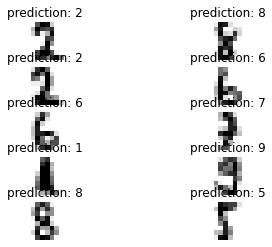

In [12]:
images_and_labels = list(zip(x_test.reshape(540, 8, 8), pred))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(5, 2, index + 1)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.axis('off')
    plt.title('prediction: %i' % label)
plt.show()